<a href="https://colab.research.google.com/github/Vanpersact/hello-world/blob/main/1-Analise_Completa_Manifestacoes_CPTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 📦 Instalar bibliotecas necessárias
!pip install wordcloud pandas matplotlib seaborn openpyxl plotly


In [2]:
# 📚 Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import defaultdict, Counter
import os
import plotly.express as px
from datetime import datetime


In [3]:
# 📁 Carregamento da base de dados
arquivo = '/content/Manifestacoes_Ago_Set2025.xlsx'
df = pd.read_excel(arquivo)


In [4]:
# 🛠️ Ajuste de colunas caso o cabeçalho esteja na linha 2
if df.columns[0] != 'COD_MANIFESTACAO':
    df.columns = df.iloc[0]
    df = df[1:]
    df.columns.name = None


In [5]:
# 🏷️ Renomear colunas principais
df = df.rename(columns={
    "COD_MANIFESTACAO": "COD_MANIFESTACAO",
    "MOTIVO": "MOTIVO",
    "DATA_MANIF": "DATA_MANIF",
    "DIA_SEM": "DIA_SEM",
    "DATA_OCOR": "DATA_OCOR",
    "HORA_OCOR": "HORA_OCOR",
    "LOCAL_REF": "LOCAL_REF",
    "DESCRIÇÃO": "DESCRICAO",
    "CLASSIFICACAO_MANIF": "CLASSIFICACAO_MANIF",
    df.columns[-1]: "LINHA"
})


In [6]:
# ⏱️ Conversão de tipos
df["DATA_MANIF"] = pd.to_datetime(df["DATA_MANIF"], errors='coerce')
df["DATA_OCOR"] = pd.to_datetime(df["DATA_OCOR"], errors='coerce')
df["HORA_OCOR"] = pd.to_numeric(df["HORA_OCOR"], errors='coerce')


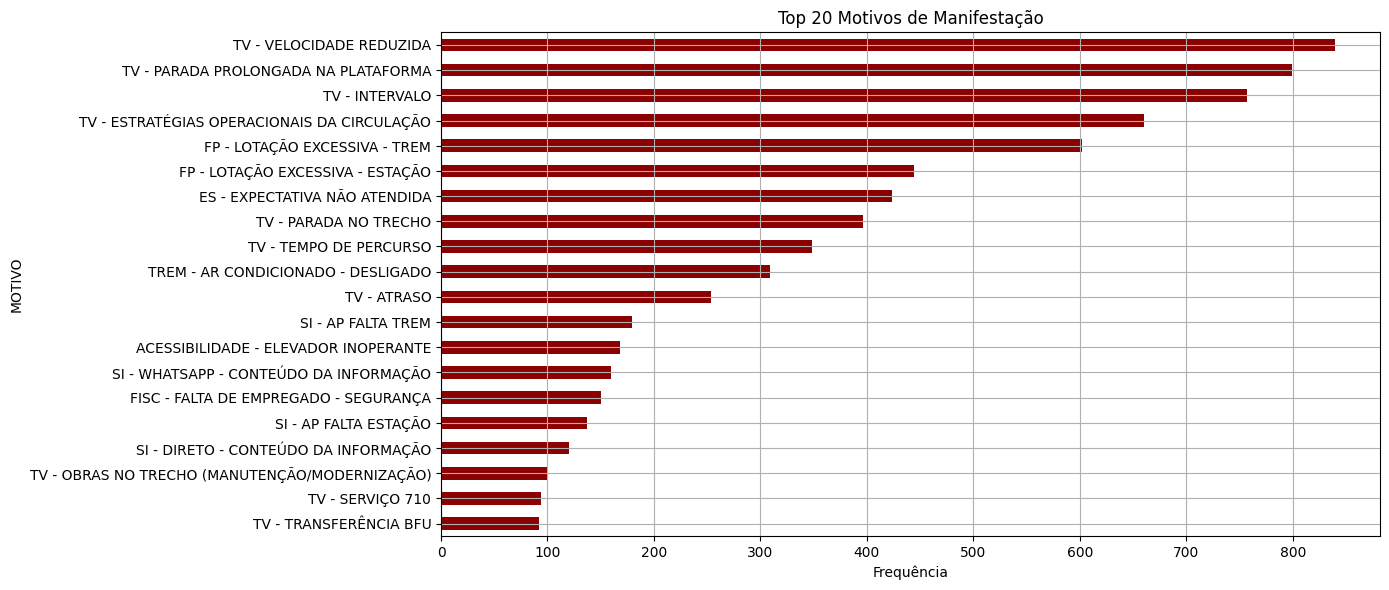

In [7]:
# 📊 Top 15 motivos de manifestação
plt.figure(figsize=(14, 6))
df["MOTIVO"].value_counts().nlargest(20).plot(kind='barh', color='darkred')
plt.title("Top 20 Motivos de Manifestação")
plt.xlabel("Frequência")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-2279681596.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="DIA_SEM", order=dias_ordenados, palette="Reds")


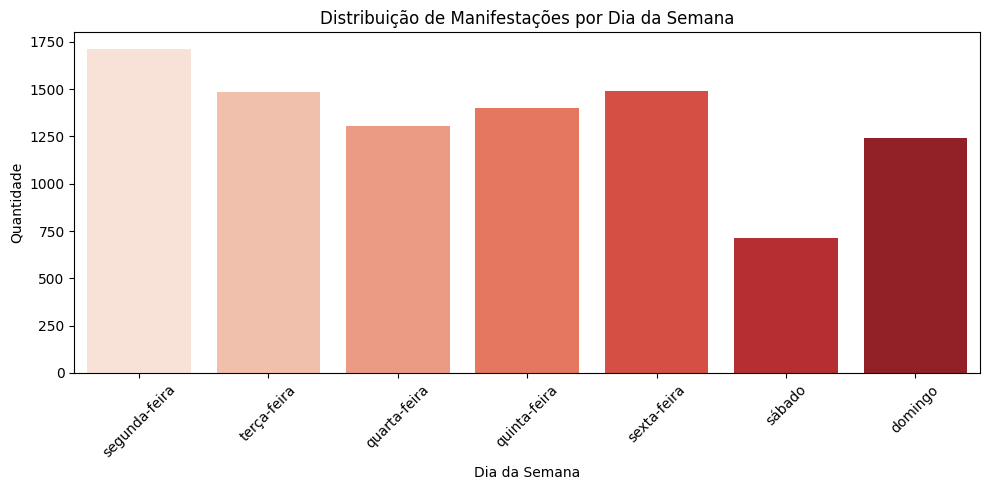

In [8]:
# 📅 Distribuição por dia da semana
dias_ordenados = ['segunda-feira', 'terça-feira', 'quarta-feira', 'quinta-feira', 'sexta-feira', 'sábado', 'domingo']
df["DIA_SEM"] = df["DIA_SEM"].str.lower()
df["DIA_SEM"] = pd.Categorical(df["DIA_SEM"], categories=dias_ordenados, ordered=True)

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="DIA_SEM", order=dias_ordenados, palette="Reds")
plt.title("Distribuição de Manifestações por Dia da Semana")
plt.ylabel("Quantidade")
plt.xlabel("Dia da Semana")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-3332646970.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index="HORA_OCOR", columns="DIA_SEM", aggfunc="size", fill_value=0)


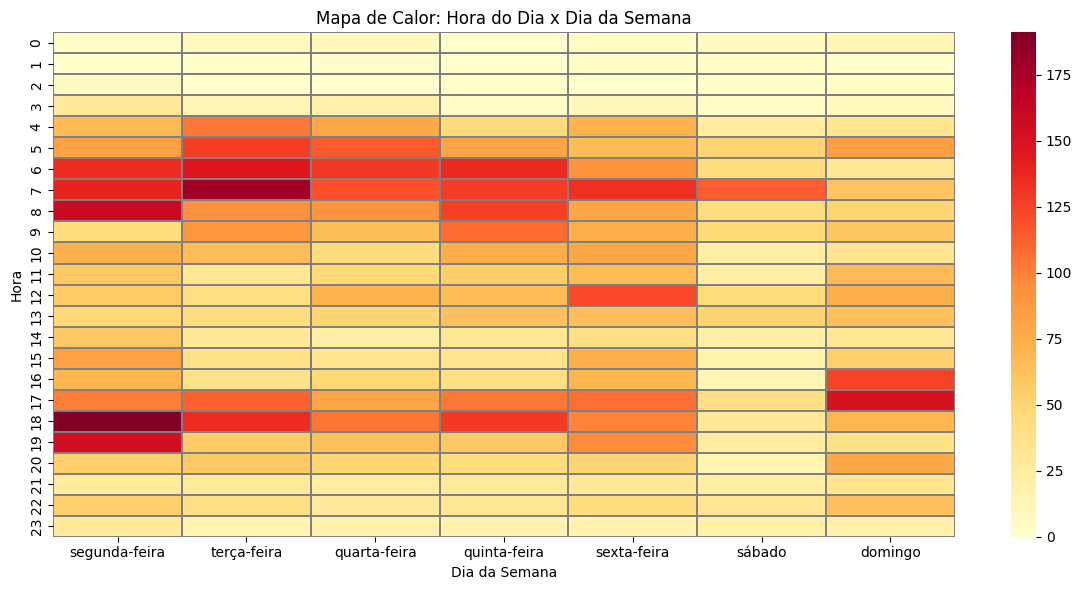

In [9]:
# 🔥 Mapa de calor por hora e dia
pivot = df.pivot_table(index="HORA_OCOR", columns="DIA_SEM", aggfunc="size", fill_value=0)
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap="YlOrRd", linewidths=0.3, linecolor='gray')
plt.title("Mapa de Calor: Hora do Dia x Dia da Semana")
plt.xlabel("Dia da Semana")
plt.ylabel("Hora")
plt.tight_layout()
plt.show()


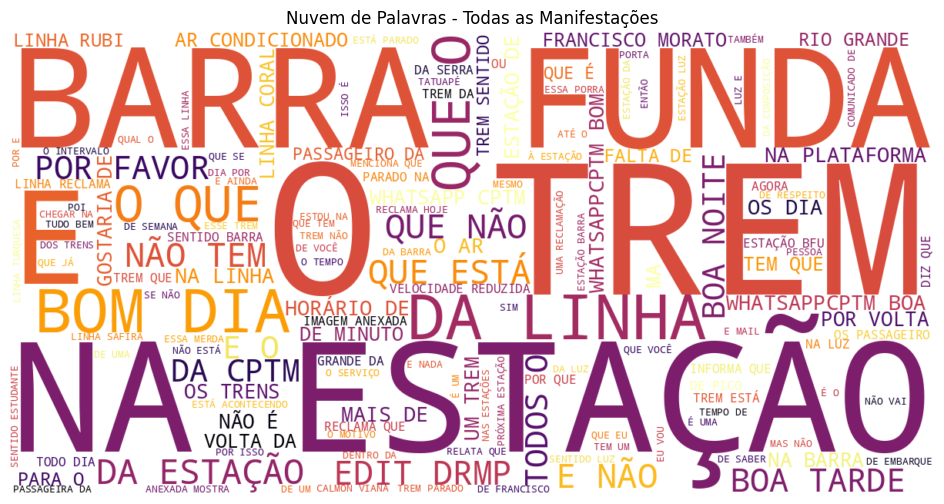

In [10]:
# ☁️ Nuvem de palavras geral (todas as manifestações)
texto = " ".join(df["DESCRICAO"].dropna().astype(str).tolist())
wordcloud = WordCloud(width=1200, height=600, background_color='white', colormap='inferno', max_words=150).generate(texto)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nuvem de Palavras - Todas as Manifestações")
plt.show()


In [11]:
# 🎯 Foco em reclamações - apenas adjetivos (simulados)
df_reclamacoes = df[df["CLASSIFICACAO_MANIF"].str.upper() == "RECLAMAÇÃO"].copy()

adjetivos_exemplo = [
    'lento', 'sujo', 'barulhento', 'quente', 'frio', 'perigoso', 'velho', 'lotado', 'demorado',
    'inseguro', 'desconfortável', 'escuro', 'caro', 'úmido', 'horrível', 'ruim', 'péssimo',
    'fraco', 'frágil', 'instável', 'precário', 'ineficiente', 'insuficiente', 'revoltante',
    'desumano', 'inaceitável', 'desagradável', 'injusto', 'problemático', 'difícil', 'caótico',
    'quebrado', 'falho', 'irregular', 'frequente', 'inconstante', 'baixa', 'curto', 'agressivo',
    'confuso', 'degradante', 'frustrante', 'impróprio', 'inadequado', 'insuportável', 'lamentável',
    'mofado', 'obsoleto', 'pobre', 'saturado', 'sofrido', 'sufocante', 'tenso', 'triste', 'vazio',
    'interminável', 'irresponsável', 'inoperante', 'defeituoso', 'danificado', 'parado', 'pior'
]
adjetivos_set = set([a.lower() for a in adjetivos_exemplo if len(a) >= 3])

adjetivos_linha = defaultdict(list)
for linha in df_reclamacoes["LINHA"].unique():
    descricoes = df_reclamacoes[df_reclamacoes["LINHA"] == linha]["DESCRICAO"].dropna().astype(str).tolist()
    palavras = " ".join(descricoes).lower().split()
    palavras_filtradas = [p for p in palavras if p in adjetivos_set]
    adjetivos_linha[linha] = palavras_filtradas

output_folder = "/content/nuvens_adjetivos"
os.makedirs(output_folder, exist_ok=True)

for linha, lista_adjetivos in adjetivos_linha.items():
    if len(lista_adjetivos) < 5:
        continue
    texto_final = " ".join(lista_adjetivos)
    wordcloud = WordCloud(width=500, height=300, background_color='white', colormap='inferno', max_words=60).generate(texto_final)
    wordcloud.to_file(os.path.join(output_folder, f"{linha.replace(' ', '_')}.png"))


In [12]:
# 📊 Ranking completo de adjetivos por linha
ranking_completo = []
for linha, lista_adjetivos in adjetivos_linha.items():
    contagem = Counter(lista_adjetivos)
    for adjetivo, freq in contagem.items():
        ranking_completo.append({
            "Linha": linha,
            "Adjetivo": adjetivo,
            "Frequência": freq
        })

df_ranking = pd.DataFrame(ranking_completo).sort_values(by=["Linha", "Frequência"], ascending=[True, False])
df_ranking.to_excel("/content/adjetivos_por_linha.xlsx", index=False)

print("✅ Tudo pronto! Arquivos gerados:")
print("- 📁 Nuvens salvas em: /content/nuvens_adjetivos")
print("- 📊 Ranking salvo em: /content/adjetivos_por_linha.xlsx")


✅ Tudo pronto! Arquivos gerados:
- 📁 Nuvens salvas em: /content/nuvens_adjetivos
- 📊 Ranking salvo em: /content/adjetivos_por_linha.xlsx


In [ ]:
# NOVA VERSÃO PARA PEGAR MAIS PALAVRAS

In [13]:
# ==============================
# 1) Imports e helpers
# ==============================
import os, re, unicodedata
import pandas as pd
from collections import Counter
from wordcloud import WordCloud



In [14]:
# Se quiser POS-tagging (apenas adjetivos), mude para True e instale/baixe o modelo do spaCy:
USE_SPACY = False
if USE_SPACY:
    import spacy
    try:
        nlp = spacy.load("pt_core_news_sm")
    except OSError:
        # !python -m spacy download pt_core_news_sm  # descomente e rode localmente se precisar
        nlp = spacy.blank("pt")  # fallback sem POS-tagging



In [15]:
# ==============================
# 2) Parâmetros de entrada
# ==============================
COL_CLASSE = "CLASSIFICACAO_MANIF"
COL_LINHA  = "LINHA"
COL_DESC   = "DESCRICAO"

# Crie/edite sua lista manual de irrelevantes (domínio CPTM, termos muito genéricos, etc.)
irrelevantes_dom = {
    "trem","estacao","linha","cptm","metro","via","mobilidade","passageiro","passageiros",
    "plataforma","sentido","embarque","desembarque","vagao","horario","servico","viagem",
    "conexao","operacao","ferroviario","ferroviaria","trilhos","ponto","sistema","dia","noite",
    "manha","tarde","hoje","ontem","amanha","bom","boa","favor","por","gentileza","obrigado",
    "obrigada","sr","sra","etc","ex","ok","bomdia","boatarde","boanoite"
}

# Stopwords PT básicas (você pode trocar por NLTK ou outra lista)
stopwords_pt = {
    "a","à","às","ao","aos","as","o","os","um","uma","uns","umas",
    "de","do","da","dos","das","d","em","no","na","nos","nas","num","numa",
    "para","pra","pro","pela","pelas","pelo","pelos","por","com","sem","sob","sobre","entre",
    "e","ou","mas","como","que","quem","qual","quais","cujo","cujos","cuja","cujas",
    "se","já","não","sim","também","muito","muitos","muita","muitas","pouco","poucos","pouca","poucas",
    "este","esta","estes","estas","esse","essa","esses","essas","aquele","aquela","aqueles","aquelas",
    "eu","tu","ele","ela","nós","vos","eles","elas","me","te","se","lhe","lhes","nos","vos",
    "meu","minha","meus","minhas","teu","tua","teus","tuas","seu","sua","seus","suas",
    "até","após","antes","depois","durante","entre","contra","desde",
    "porque","porquê","porém","todavia","entretanto","então","logo","pois",
    "aqui","ali","lá","onde","quando","tambem"
}

# Caso você queira manter acentos para exibição mas normalizar para contagem:
def normalize_token(tok: str) -> str:
    # remove acento e deixa minúsculo
    t = unicodedata.normalize("NFKD", tok).encode("ascii", "ignore").decode("ascii")
    return t.lower()

TOKEN_MIN_LEN = 2  # descarta tokens muito curtos (ex: 'de', 'a', etc.)
KEEP_ACCENTS_FOR_DISPLAY = True  # mantém a forma original em relatórios, mas conta na forma normalizada



In [16]:
# ==============================
# 3) Seleção: somente RECLAMAÇÃO
# ==============================
df_reclamacoes = df[df[COL_CLASSE].str.upper() == "RECLAMAÇÃO"].copy()
df_reclamacoes = df_reclamacoes.dropna(subset=[COL_DESC])

# ==============================
# 4) Tokenização e limpeza
# ==============================
url_pat   = re.compile(r"https?://\S+|www\.\S+")
email_pat = re.compile(r"\S+@\S+")
# mantém apenas letras (inclui acentuadas) e hífen interno. Troca o resto por espaço.
letters_pat = re.compile(r"[^A-Za-zÀ-ÖØ-öø-ÿ\-]+")

def tokenize_pt(texto: str):
    # remove URLs/emails
    t = url_pat.sub(" ", str(texto))
    t = email_pat.sub(" ", t)
    # padroniza apóstrofos/hífens
    t = t.replace("’", "'").replace("–", "-").replace("—", "-")
    # remove tudo que não for letra/hífen
    t = letters_pat.sub(" ", t)
    # quebra
    raw_tokens = [w.strip("-") for w in t.split() if w.strip("-")]
    return raw_tokens

# Explode por manifestação (id opcional, se existir)
id_col = "ID" if "ID" in df_reclamacoes.columns else None
rows = []
for idx, row in df_reclamacoes.iterrows():
    linha = str(row.get(COL_LINHA, "SEM_LINHA"))
    desc  = str(row[COL_DESC])
    toks  = tokenize_pt(desc)

    for w in toks:
        w_norm = normalize_token(w)
        if len(w_norm) < TOKEN_MIN_LEN:
            continue
        # stoplists (normalizadas)
        if w_norm in {normalize_token(x) for x in stopwords_pt}:
            continue
        if w_norm in {normalize_token(x) for x in irrelevantes_dom}:
            continue
        rows.append({
            "linha": linha,
            "token": w if KEEP_ACCENTS_FOR_DISPLAY else w_norm,
            "token_norm": w_norm,
            "manifestacao_id": row[id_col] if id_col else idx
        })

tokens_df = pd.DataFrame(rows)



In [17]:
# ==============================
# 5) (Opcional) filtrar só ADJETIVOS com spaCy
# ==============================
if USE_SPACY and not nlp.pipe_names:
    nlp.add_pipe("tagger")  # fallback mínimo

if USE_SPACY and len(tokens_df) > 0:
    # Para manter performance, processa em lote por manifestação + reconstrói adjetivos
    # Observação: como perdemos contexto por token, aqui simplificamos e checamos POS no texto completo.
    # Alternativa robusta: reprocessar DESCRICAO e marcar as palavras ADJ.
    adjetivos_norm = set()
    for _, r in df_reclamacoes.iterrows():
        doc = nlp(str(r[COL_DESC]))
        for t in doc:
            if t.pos_ == "ADJ":
                adjetivos_norm.add(normalize_token(t.text))
    tokens_df = tokens_df[tokens_df["token_norm"].isin(adjetivos_norm)].copy()



In [18]:
# ==============================
# 6) Tabela mestra (todas as palavras)
# ==============================
# Frequência total
freq_total = tokens_df.groupby("token", as_index=False).agg(
    freq=("token", "count"),
    docs=("manifestacao_id", pd.Series.nunique)
).sort_values("freq", ascending=False)

# Frequência por LINHA
freq_linha = tokens_df.groupby(["linha", "token"], as_index=False).agg(
    freq=("token", "count"),
    docs=("manifestacao_id", pd.Series.nunique)
).sort_values(["linha","freq"], ascending=[True, False])

# (Opcional) pivot por LINHA para visão rápida
pivot_linha = freq_linha.pivot_table(index="token", columns="linha", values="freq", fill_value=0)
pivot_linha = pivot_linha.sort_values(by=pivot_linha.columns.tolist(), ascending=False)



In [19]:
# ==============================
# 7) Exportar para Excel (gera "palavras_reclamacoes.xlsx", para depois eu gerar "palavras_reclamacoes_padronizado.xlsx")
# ==============================

!pip install xlsxwriter

saida_excel = "Palavras_reclamacoes.xlsx"
with pd.ExcelWriter(saida_excel, engine="xlsxwriter") as xw:
    freq_total.to_excel(xw, index=False, sheet_name="todas_palavras")
    freq_linha.to_excel(xw, index=False, sheet_name="por_linha")
    pivot_linha.reset_index().to_excel(xw, index=False, sheet_name="pivot_linha")
print(f"Arquivo gerado: {saida_excel}")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 4.4 MB/s eta 0:00:00
Arquivo gerado: Palavras_reclamacoes.xlsx


In [20]:
# ==============================
# 8) (Depois) Você me devolve uma lista aprovada
#    Ex.: um CSV com uma coluna 'token' contendo as palavras que deseja manter
# ==============================
# Exemplo de leitura (descomente quando tiver o arquivo):
# aprovadas = pd.read_csv("palavras_aprovadas.csv")  # coluna 'token'
# aprovadas["token_norm"] = aprovadas["token"].map(normalize_token)
# tokens_filtrado = tokens_df[tokens_df["token_norm"].isin(set(aprovadas["token_norm"]))].copy()

# Para fins de demonstração, vou fingir que aprovamos as 500 mais frequentes:
topN = 500
tokens_filtrado = tokens_df.merge(freq_total.head(topN)[["token"]], on="token", how="inner")



In [21]:
# ==============================
# 9) Geração da nuvem de palavras (por LINHA e geral)
# ==============================
output_folder = "nuvens_palavras"
os.makedirs(output_folder, exist_ok=True)

def gerar_wordcloud(texto, nome_arquivo, width=1200, height=700, max_words=200):
    if not texto.strip():
        return
    wc = WordCloud(
        width=width, height=height,
        background_color="white",
        max_words=max_words
        # sem colormap fixo p/ manter estilo neutro; ajuste se quiser
    ).generate(texto)
    wc.to_file(os.path.join(output_folder, nome_arquivo))

# Por linha
for linha, sub in tokens_filtrado.groupby("linha"):
    palavras = " ".join(sub["token"].tolist())
    if len(palavras.split()) >= 5:
        gerar_wordcloud(palavras, f"linha_{str(linha).replace(' ','_')}.png")

# Geral
geral_texto = " ".join(tokens_filtrado["token"].tolist())
gerar_wordcloud(geral_texto, "geral.png")

print(f"Imagens salvas em: {output_folder}")

Imagens salvas em: nuvens_palavras


In [ ]:
#novo código para as nuvens de palavras com padronização/normalização - PARA APROVADAS

In [22]:
# === NOVO BLOCO: ler a matriz enriquecida ===
# Pode ser o mesmo arquivo que você exportou, desde que agora tenha as colunas novas
ARQ_MATRIZ = "Palavras_reclamacoes_padronizado.xlsx"  # ajuste se seu arquivo tiver outro nome
ABA_MATRIZ = "Aprovadas"             # ajuste se estiver em outra aba

matriz = pd.read_excel(ARQ_MATRIZ, sheet_name=ABA_MATRIZ)

# Normaliza nomes de colunas
matriz.columns = [c.strip().lower() for c in matriz.columns]

# Garante existência das colunas esperadas
esperadas = {"token", "padronizacao", "aprovadas"}
faltando = esperadas - set(matriz.columns)
if faltando:
    raise ValueError(f"Faltam colunas na planilha: {faltando}")

# Limpezas de base
matriz["token"] = matriz["token"].astype(str).str.strip()
matriz["padronizacao"] = matriz["padronizacao"].astype(str).fillna("").str.strip()
matriz["aprovadas"] = matriz["aprovadas"].astype(str).fillna("").str.strip().str.upper()

# Sinal binário de aprovadas (aceita X, SIM, S, 1, TRUE)
matriz["is_aprovada"] = matriz["aprovadas"].isin(["X","SIM","S","1","TRUE","T"])

# Para casar com tokens_df com robustez, criamos a chave normalizada
matriz["token_norm"] = matriz["token"].map(normalize_token)

# Fallback de padronização: se vazio, usar token normalizado
matriz["padronizacao_norm"] = matriz["padronizacao"]
matriz.loc[matriz["padronizacao_norm"].eq(""), "padronizacao_norm"] = matriz.loc[
    matriz["padronizacao_norm"].eq(""), "token_norm"
]

In [ ]:
#-----------------------------------------------------------------------------------------------
#NOVO CÓDIGO para as nuvens de palavras com padronização/normalização - PARA APENAS OS ADJETIVOS
#-----------------------------------------------------------------------------------------------

In [23]:
# === NOVO BLOCO: ler a matriz enriquecida ===
# Pode ser o mesmo arquivo que você exportou, desde que agora tenha as colunas novas
ARQ_MATRIZ = "Palavras_reclamacoes_padronizado.xlsx"  # ajuste se seu arquivo tiver outro nome
ABA_MATRIZ = "Aprovadas"             # ajuste se estiver em outra aba

matriz = pd.read_excel(ARQ_MATRIZ, sheet_name=ABA_MATRIZ)

# Normaliza nomes de colunas
matriz.columns = [c.strip().lower() for c in matriz.columns]

# Garante existência das colunas esperadas
esperadas = {"token", "padronizacao", "adjetivos"}
faltando = esperadas - set(matriz.columns)
if faltando:
    raise ValueError(f"Faltam colunas na planilha: {faltando}")

# Limpezas de base
matriz["token"] = matriz["token"].astype(str).str.strip()
matriz["padronizacao"] = matriz["padronizacao"].astype(str).fillna("").str.strip()
matriz["adjetivos"] = matriz["adjetivos"].astype(str).fillna("").str.strip().str.upper()

# Sinal binário de aprovadas (aceita X, SIM, S, 1, TRUE)
matriz["is_aprovada"] = matriz["adjetivos"].isin(["X","SIM","S","1","TRUE","T"])

# Para casar com tokens_df com robustez, criamos a chave normalizada
matriz["token_norm"] = matriz["token"].map(normalize_token)

# Fallback de padronização: se vazio, usar token normalizado
matriz["padronizacao_norm"] = matriz["padronizacao"]
matriz.loc[matriz["padronizacao_norm"].eq(""), "padronizacao_norm"] = matriz.loc[
    matriz["padronizacao_norm"].eq(""), "token_norm"
]

In [24]:
# === SUBSTITUIR BLOCO DE FILTRO/SELEÇÃO ===
# Junta tokens detectados (tokens_df) com sua matriz (por token_norm)
tokens_join = tokens_df.merge(
    matriz[["token_norm","padronizacao","padronizacao_norm","is_aprovada"]],
    on="token_norm", how="left"
)

# Se não tiver padronizacao definida, usa o próprio token (display)
tokens_join["padronizacao_final"] = tokens_join["padronizacao"]
tokens_join.loc[
    tokens_join["padronizacao_final"].isna() | (tokens_join["padronizacao_final"].astype(str).str.len()==0),
    "padronizacao_final"
] = tokens_join["token"]

# Mantém apenas as aprovadas
tokens_aprov = tokens_join[tokens_join["is_aprovada"].fillna(False)].copy()

# WordCloud trata espaço como separador; para manter termos compostos como uma “palavra”, trocamos por underscore
import re
tokens_aprov["wc_token"] = tokens_aprov["padronizacao_final"].astype(str).apply(lambda s: re.sub(r"\s+","_",s))

In [25]:
# === NOVO: dicionários de frequências para a nuvem ===
# Geral
freq_geral = tokens_aprov["wc_token"].value_counts().to_dict()

# Por linha
freq_por_linha = (
    tokens_aprov.groupby(["linha","wc_token"])
    .size()
    .reset_index(name="freq")
)

# (Opcional) salvar um Excel com as frequências padronizadas aprovadas, para auditoria
with pd.ExcelWriter("freq_aprovadas.xlsx", engine="openpyxl") as xw:
    pd.Series(freq_geral, name="freq").rename_axis("padronizacao").reset_index() \
        .to_excel(xw, index=False, sheet_name="geral")
    freq_por_linha.to_excel(xw, index=False, sheet_name="por_linha")

In [26]:
print(freq_por_linha.columns.tolist())

['linha', 'wc_token', 'freq']


In [27]:
# === SUBSTITUIR A PARTE DAS NUVENS (maiores=vermelho, menores=preto) ===
import os, re
from wordcloud import WordCloud
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib import cm

output_folder = "nuvens_palavras"
os.makedirs(output_folder, exist_ok=True)

# Paleta (baixo→alto, já na ordem fria→quente — o PRETO vai por regra abaixo, via threshold)
# roxo escuro → roxo claro → cinza → amarelo → laranja → vermelho claro → vermelho real
colors = [
    (0.26, 0.00, 0.40),  # roxo escuro
    (0.60, 0.40, 0.80),  # roxo claro
    (0.60, 0.60, 0.60),  # cinza
    (1.00, 0.90, 0.00),  # amarelo
    (1.00, 0.60, 0.00),  # laranja
    (1.00, 0.40, 0.40),  # vermelho claro
    (0.80, 0.00, 0.00),  # vermelho real
]
cmap = LinearSegmentedColormap.from_list("cool_to_hot", colors, N=256)

# % mais baixo que irá em PRETO (ajuste se quiser)
PCT_PRETO = 0.25  # 25% mais baixas ficam pretas

def _wc_term(s: str) -> str:
    return re.sub(r"\s+", "_", str(s).strip())

def _make_color_func(freq_dict, pct_preto=PCT_PRETO):
    vals = np.array(list(freq_dict.values()), dtype=float)
    vmin, vmax = float(vals.min()), float(vals.max())
    if vmin == vmax:  # evita faixa nula
        vmin, vmax = vmin - 1.0, vmax + 1.0

    def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
        f = float(freq_dict.get(word, vmin))
        # normaliza para [0,1]
        x = (f - vmin) / (vmax - vmin)
        # parte preta (palavras menores)
        if x <= pct_preto:
            return "rgb(0,0,0)"
        # remapeia o restante para [0,1] e aplica gradiente até vermelho
        x2 = (x - pct_preto) / (1.0 - pct_preto)
        r, g, b, _ = cm.ScalarMappable(norm=Normalize(0, 1), cmap=cmap).to_rgba(x2)
        return f"rgb({int(r*255)},{int(g*255)},{int(b*255)})"

    return color_func

def gerar_wordcloud_freq(freq_dict, nome_arquivo, width=1300, height=700, max_words=200):
    if not freq_dict:
        return
    wc = WordCloud(
        width=width, height=height, background_color="white",
        max_words=max_words, collocations=False
    ).generate_from_frequencies(freq_dict)
    wc = wc.recolor(color_func=_make_color_func(freq_dict))
    wc.to_file(os.path.join(output_folder, nome_arquivo))

# ---------- Nuvem geral ----------
# freq_geral: {padronizacao: freq}
freq_geral_wc = { _wc_term(k): v for k, v in freq_geral.items()
                  if isinstance(k, str) and k.strip() and k.lower() != "nan" }
gerar_wordcloud_freq(freq_geral_wc, "geral.png")

# ---------- Nuvens por LINHA ----------
# freq_por_linha com colunas ["linha","padronizacao","freq"]
for linha, sub in freq_por_linha.groupby("linha"):
    sub = sub.dropna(subset=["wc_token"])
    sub = sub[sub["wc_token"].astype(str).str.strip().ne("") &
              sub["wc_token"].astype(str).str.lower().ne("nan")]
    labels = sub["wc_token"].astype(str).map(_wc_term)
    freq_dict = dict(zip(labels, sub["freq"]))
    if sum(freq_dict.values()) < 5:
        continue
    gerar_wordcloud_freq(freq_dict, f"linha_{str(linha).replace(' ','_')}.png")

##Específico para o refinamento da padronização

In [28]:
# ==============================================
# 🔹 CURADORIA DE AGRUPAMENTO MORFOLÓGICO + SEMÂNTICO
# ==============================================

!pip install unidecode

# --- 1️⃣ IMPORTS ---
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, util
import unidecode


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 5.2 MB/s eta 0:00:00


In [29]:
# --- 2️⃣ CARREGAR DADOS ---
df = pd.read_csv("/content/padronizado_GPT.csv", sep=";", encoding="utf-8", engine="python")
print(df.columns.tolist())
df.head(5)



['token', 'padronizacao', 'aprovadas']


,token,padronizacao,aprovadas
0,ABAFADA,ABAFADO,X
1,ABAFADO,ABAFADO,X
2,ABAFADOS,ABAFADO,X
3,ABANDONADA,ABANDONADA,X
4,ABANDONADO,ABANDONADA,X


In [30]:
df.columns = [c.strip().lower() for c in df.columns]
df = df.dropna(subset=["token"])
df["token"] = df["token"].astype(str).str.strip()


In [31]:
# --- 3️⃣ LIMPEZA BÁSICA ---
def limpar_texto(t):
    t = t.lower().strip()
    t = unidecode.unidecode(t)
    t = "".join(ch for ch in t if ch.isalpha())  # remove números e símbolos
    return t

df["token_limpo"] = df["token"].apply(limpar_texto)
df["padronizacao_limpa"] = df["padronizacao"].apply(lambda x: limpar_texto(str(x)))


In [32]:
# --- 4️⃣ MODELO SEMÂNTICO ---
modelo = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [33]:
# --- 5️⃣ GERAR EMBEDDINGS (representações semânticas) ---
tokens_unicos = sorted(df["token_limpo"].unique())
embeddings = modelo.encode(tokens_unicos, convert_to_tensor=True, show_progress_bar=True)


Batches:   0%|          | 0/421 [00:00<?, ?it/s]

In [ ]:
# --- 6️⃣ CALCULAR SIMILARIDADE ENTRE TODOS OS TOKENS ---
similaridades = util.pytorch_cos_sim(embeddings, embeddings).numpy()


In [ ]:
# --- 7️⃣ AGRUPAR SINÔNIMOS / FLEXÕES ---
limite_similaridade = 0.98  # 0.75–0.85 é um bom intervalo
agrupamentos = []
usados = set()

for i, tok_base in enumerate(tokens_unicos):
    if tok_base in usados:
        continue

    grupo = [tok_base]
    usados.add(tok_base)

    for j, tok_comp in enumerate(tokens_unicos):
        if i == j or tok_comp in usados:
            continue
        sim = similaridades[i][j]
        # Critérios: alta similaridade e raiz próxima
        if sim >= limite_similaridade or tok_base[:5] == tok_comp[:5]:
            grupo.append(tok_comp)
            usados.add(tok_comp)

    agrupamentos.append(grupo)


In [ ]:
# --- 8️⃣ CRIAR TABELA DE AGRUPAMENTOS ---
saida = []
for grupo in agrupamentos:
    if len(grupo) < 2:
        continue
    principal = grupo[0]
    for termo in grupo[1:]:
        saida.append({
            "token": termo,
            "padronizacao_sugerida": principal,
            "tipo_de_agrupamento": "sinônimo/flexão",
        })

tabela_agrup = pd.DataFrame(saida)
tabela_agrup.head(20)


,token,padronizacao_sugerida,tipo_de_agrupamento
0,aaaaaa,aaaaa,sinônimo/flexão
1,aah,aaah,sinônimo/flexão
2,abafado,abafada,sinônimo/flexão
3,abafados,abafada,sinônimo/flexão
4,abalada,abafada,sinônimo/flexão
5,abaixar,abaixa,sinônimo/flexão
6,abaixem,abaixa,sinônimo/flexão
7,abaixo,abaixa,sinônimo/flexão
8,abaixoassinado,abaixa,sinônimo/flexão
9,abaixou,abaixa,sinônimo/flexão


In [ ]:
# --- 9️⃣ SALVAR RESULTADO ---
tabela_agrup.to_excel("/content/agrupamentos_sugeridos.xlsx", index=False)
print(f"Tabela salva com {len(tabela_agrup)} sugestões de agrupamento.")

Tabela salva com 7469 sugestões de agrupamento.


##Agrupamento em Grafo

In [ ]:
# ==============================================
# 🔹 VISUALIZAÇÃO — REDE DE AGRUPAMENTOS DE PALAVRAS
# ==============================================

import networkx as nx
import plotly.graph_objects as go
import random


In [ ]:
# Carrega o resultado anterior
tabela_agrup = pd.read_excel("/content/agrupamentos_sugeridos.xlsx")


In [ ]:
# Cria grafo vazio
G = nx.Graph()

# Adiciona as conexões (arestas)
for _, row in tabela_agrup.iterrows():
    G.add_node(row["token"])
    G.add_node(row["padronizacao_sugerida"])
    G.add_edge(row["token"], row["padronizacao_sugerida"])

# Posições dos nós (layout de rede)
pos = nx.spring_layout(G, seed=42, k=0.45)  # k controla espaçamento

# Extrai coordenadas
x_nodes = [pos[k][0] for k in G.nodes()]
y_nodes = [pos[k][1] for k in G.nodes()]
x_edges, y_edges = [], []

for e in G.edges():
    x_edges += [pos[e[0]][0], pos[e[1]][0], None]
    y_edges += [pos[e[0]][1], pos[e[1]][1], None]


In [ ]:
# Define cores aleatórias por agrupamento
color_map = {}
for i, grupo in enumerate(tabela_agrup["padronizacao_sugerida"].unique()):
    color_map[grupo] = f"hsl({random.randint(0,360)},70%,55%)"

node_colors = [color_map[tabela_agrup.loc[tabela_agrup["token"] == node, "padronizacao_sugerida"].values[0]]
                if node in tabela_agrup["token"].values else "#cccccc"
                for node in G.nodes()]


In [ ]:
# Cria figura interativa com Plotly
fig = go.Figure()

# Arestas (linhas)
fig.add_trace(go.Scatter(
    x=x_edges, y=y_edges,
    mode='lines',
    line=dict(color='rgba(180,180,180,0.4)', width=1),
    hoverinfo='none'
))

# Nós (palavras)
fig.add_trace(go.Scatter(
    x=x_nodes, y=y_nodes,
    mode='markers+text',
    marker=dict(size=14, color=node_colors, line=dict(width=0.5, color='white')),
    text=list(G.nodes()),
    textposition='top center',
    hoverinfo='text',
))

# Layout final
fig.update_layout(
    title="Mapa de Sinônimos e Flexões — Curadoria Linguística e Semântica",
    showlegend=False,
    margin=dict(l=0, r=0, t=60, b=0),
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white', size=12),
)

fig.show()

##Cesta de Compras

In [ ]:
# ================================================================
# 🧺 Cesta de Compras de MOTIVOS (Market Basket Analysis)
# Layout esperado: DATA | PROTOCOLO | MOTIVO | LINHA
# ---------------------------------------------------------------
# Saídas:
#  - itemsets_frequentes.csv / .xlsx
#  - regras_associacao.csv / .xlsx
#  - coocorrencia_matriz.csv / .xlsx
#  - coocorrencia_arestas.csv / .xlsx (para grafo)
# ---------------------------------------------------------------
# Opcional: segmentar por LINHA e/ou por intervalo de DATA
# ================================================================

# 1) Instalar libs (se necessário) — descomente na primeira execução
# !pip install mlxtend networkx openpyxl xlsxwriter

import os
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import MultiLabelBinarizer
import networkx as nx
import matplotlib.pyplot as plt



/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).



In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# ================================================================
# 🔹 ETAPA 1 – Leitura e limpeza da base
# ================================================================

import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# Caminho do arquivo
ARQUIVO = "/content/Relacao_Motivos.xlsx"

# Leitura do Excel
df = pd.read_excel(ARQUIVO, engine="openpyxl")
df.columns = [c.strip().upper() for c in df.columns]

# Garantir colunas básicas
obrigatorias = {"DATA", "PROTOCOLO", "MOTIVO", "LINHA"}
faltando = obrigatorias - set(df.columns)
if faltando:
    raise ValueError(f"As colunas obrigatórias estão faltando: {faltando}")

# Limpeza básica
df = df.dropna(subset=["PROTOCOLO", "MOTIVO"])
df["PROTOCOLO"] = df["PROTOCOLO"].astype(str).str.strip()
df["MOTIVO"] = df["MOTIVO"].astype(str).str.strip()
df["LINHA"] = df["LINHA"].astype(str).str.strip()

print("✅ Linhas após limpeza:", len(df))
print(df.head(8))

✅ Linhas após limpeza: 9347
        DATA    PROTOCOLO                                MOTIVO     LINHA
0 2025-08-01  2025/073241              EMPR - SEGURANÇA POSTURA  LINHA 12
1 2025-08-01  2025/073241         ES - EXPECTATIVA NÃO ATENDIDA   SISTEMA
2 2025-08-01  2025/073242  TV - PARADA PROLONGADA NA PLATAFORMA  LINHA 07
3 2025-08-01  2025/073244                    TREM - CONSERVAÇÃO  LINHA 11
4 2025-08-01  2025/073248              EMPR - SEGURANÇA POSTURA  LINHA 11
5 2025-08-01  2025/073248            PO - SUPORTE AO PASSAGEIRO  LINHA 11
6 2025-08-01  2025/073249  ACESSIBILIDADE - ELEVADOR INOPERANTE  LINHA 11
7 2025-08-01  2025/073249      ESTAÇÃO - ESCADA ROLANTE - FALTA  LINHA 11


In [ ]:
# ================================================================
# 🔹 ETAPA 2 – Criação das cestas (PROTOCOLO → lista de motivos)
# ================================================================

# Cada protocolo corresponde a uma "cesta" de motivos únicos
cestas = (
    df.groupby("PROTOCOLO")["MOTIVO"]
      .apply(lambda s: sorted(set(s)))
      .reset_index(name="MOTIVOS")
)

# Transformar as listas em matriz binária (One-Hot)
mlb = MultiLabelBinarizer()
X = pd.DataFrame(
    mlb.fit_transform(cestas["MOTIVOS"]),
    index=cestas["PROTOCOLO"],
    columns=[str(it) for it in mlb.classes_]
)

print("✅ Matriz transacional criada:", X.shape)
print("Exemplo de colunas:", X.columns[:10].tolist())

# ================================================================
# 🔹 ETAPA 3 – Sugestão automática de parâmetros
# ================================================================

def sugerir_parametros(X, alvo_cobertura=0.80, min_abs=5, frac_abs=0.01):
    """
    Sugere valores iniciais de MIN_SUPPORT, MIN_CONFIDENCE e MIN_LIFT
    com base na densidade e no tamanho da amostra.
    """
    import numpy as np

    N = X.shape[0]
    min_count = max(min_abs, int(np.ceil(frac_abs * N)))
    min_support = min_count / N

    # Frequência dos motivos
    freq_itens = X.sum(axis=0).sort_values(ascending=False)
    cobertura = (freq_itens.cumsum() / N)

    sugestoes = {
        "MIN_SUPPORT": round(min_support, 4),
        "MIN_CONFIDENCE": 0.5,
        "MIN_LIFT": 1.2,
        "ABS_MIN_COUNT": min_count,
        "OBS": f"N={N}, itens_top_cobrem_{alvo_cobertura*100:.0f}%"
    }
    print("\n🎯 Sugestões de parâmetros:")
    for k, v in sugestoes.items():
        print(f"   {k}: {v}")
    return sugestoes

# Uso:
params = sugerir_parametros(X, alvo_cobertura=0.80, min_abs=8, frac_abs=0.01)

# Guardar nas variáveis principais
MIN_SUPPORT    = params["MIN_SUPPORT"]
MIN_CONFIDENCE = params["MIN_CONFIDENCE"]
MIN_LIFT       = params["MIN_LIFT"]

✅ Matriz transacional criada: (4710, 172)
Exemplo de colunas: ['ACESSIBILIDADE - ASSENTO PREFERENCIAL', 'ACESSIBILIDADE - ELEVADOR FALTA', 'ACESSIBILIDADE - ELEVADOR INOPERANTE', 'ACESSIBILIDADE - EQUIPAMENTOS ESPECIAIS', 'ACESSIBILIDADE - EQUIPAMENTOS ESPECIAIS - FALTA', 'ACESSIBILIDADE - RAMPA - FALTA', 'ACESSIBILIDADE - SANITÁRIO PREFERENCIAL', 'ACESSIBILIDADE - SUPORTE AO PASSAGEIRO', 'CI - 0800 - CENTRAL DE ATENDIMENTO', 'CI - ACHADOS E PERDIDOS']

🎯 Sugestões de parâmetros:
   MIN_SUPPORT: 0.0102
   MIN_CONFIDENCE: 0.5
   MIN_LIFT: 1.2
   ABS_MIN_COUNT: 48
   OBS: N=4710, itens_top_cobrem_80%


In [ ]:
# =========== PARÂMETROS ===========
ARQ = "/content/Relacao_Motivos.xlsx"  # ajuste para .csv ou .xlsx
E_EXCEL = True                # se True, tenta salvar .xlsx (fallback para CSV se não tiver xlsxwriter)
#SEP = ","                    # separador do CSV (se usar .xlsx, ignore)
MIN_SUPPORT = 0.005           # suporte mínimo (2% dos protocolos)
MIN_CONFIDENCE = 0.2          # confiança mínima
MIN_LIFT = 0.8                # lift mínimo
DATA_INICIO = None            # ex.: "2025-08-01"
DATA_FIM = None               # ex.: "2025-08-31"
FILTRAR_LINHA = None          # ex.: "LINHA 12" ou None para geral
SAIDA_DIR = "/content/saida_basket"
os.makedirs(SAIDA_DIR, exist_ok=True)

# =========== 2) Leitura robusta ===========
def ler_tabela(caminho, sep=","):
    caminho = str(caminho)
    if caminho.lower().endswith(".xlsx"):
        df = pd.read_excel(caminho, engine="openpyxl")
    else:
        # tenta com separador informado; se falhar, tenta ponto e vírgula
        try:
            df = pd.read_csv(caminho, sep=sep, engine="python")
        except Exception:
            df = pd.read_csv(caminho, sep=";", engine="python")
    # normaliza nomes
    df.columns = [c.strip().upper() for c in df.columns]
    # garante colunas básicas
    obrig = {"DATA", "PROTOCOLO", "MOTIVO", "LINHA"}
    faltam = obrig - set(df.columns)
    if faltam:
        raise ValueError(f"Faltam colunas no arquivo: {faltam}. Cabeçalho lido: {df.columns.tolist()}")
    return df

df = ler_tabela(ARQ, sep=SEP)

# =========== 3) Limpeza e filtros opcionais ===========
# padroniza tipos
df["DATA"] = pd.to_datetime(df["DATA"], dayfirst=True, errors="coerce")
df["PROTOCOLO"] = df["PROTOCOLO"].astype(str).str.strip()
df["MOTIVO"] = df["MOTIVO"].astype(str).str.strip()
df["LINHA"] = df["LINHA"].astype(str).str.strip()

# remove linhas inválidas
df = df.dropna(subset=["PROTOCOLO", "MOTIVO"])
df = df[(df["PROTOCOLO"] != "") & (df["MOTIVO"] != "")].copy()

# filtros
if DATA_INICIO:
    df = df[df["DATA"] >= pd.to_datetime(DATA_INICIO)]
if DATA_FIM:
    df = df[df["DATA"] <= pd.to_datetime(DATA_FIM)]
if FILTRAR_LINHA:
    df = df[df["LINHA"].str.upper() == FILTRAR_LINHA.upper()]

print("Amostra após limpeza/filtros:")
print(df.head(8))

# =========== 4) Construir as cestas por PROTOCOLO ===========
# cada protocolo → conjunto de motivos únicos (evita duplicata no mesmo protocolo)
cestas = (
    df.groupby("PROTOCOLO")["MOTIVO"]
      .apply(lambda s: sorted(set(s)))
      .reset_index(name="MOTIVOS")
)

# One-hot (transação x item)
mlb = MultiLabelBinarizer()
X = pd.DataFrame(mlb.fit_transform(cestas["MOTIVOS"]),
                 index=cestas["PROTOCOLO"],
                 columns=[str(it) for it in mlb.classes_])
print(f"\nDimensão da matriz transacional: {X.shape}")



Amostra após limpeza/filtros:
        DATA    PROTOCOLO                                MOTIVO     LINHA
0 2025-08-01  2025/073241              EMPR - SEGURANÇA POSTURA  LINHA 12
1 2025-08-01  2025/073241         ES - EXPECTATIVA NÃO ATENDIDA   SISTEMA
2 2025-08-01  2025/073242  TV - PARADA PROLONGADA NA PLATAFORMA  LINHA 07
3 2025-08-01  2025/073244                    TREM - CONSERVAÇÃO  LINHA 11
4 2025-08-01  2025/073248              EMPR - SEGURANÇA POSTURA  LINHA 11
5 2025-08-01  2025/073248            PO - SUPORTE AO PASSAGEIRO  LINHA 11
6 2025-08-01  2025/073249  ACESSIBILIDADE - ELEVADOR INOPERANTE  LINHA 11
7 2025-08-01  2025/073249      ESTAÇÃO - ESCADA ROLANTE - FALTA  LINHA 11

Dimensão da matriz transacional: (4710, 172)



Itemsets frequentes: 142 | Regras: 85

Arquivos salvos em: /content/saida_basket


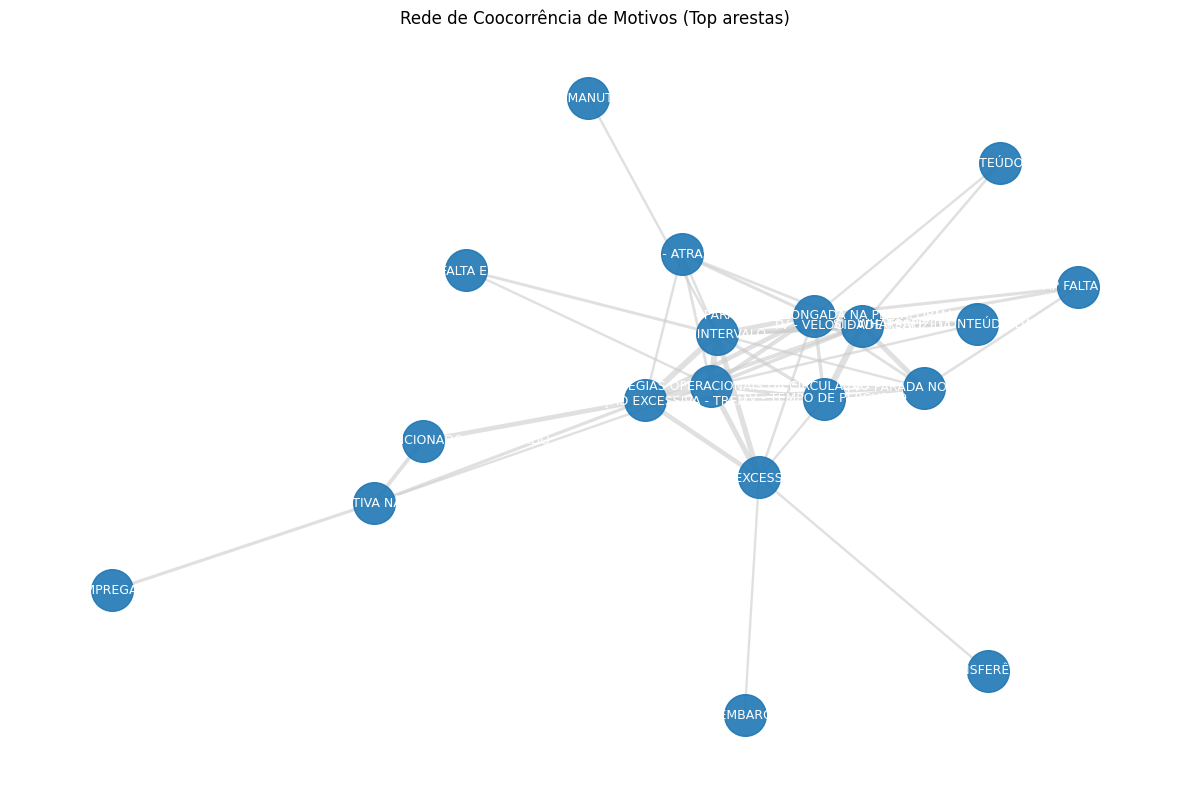

In [ ]:
# =========== 5) Itens frequentes (Apriori) ===========
freq_items = apriori(X.astype(bool), min_support=MIN_SUPPORT, use_colnames=True)
# tamanho do itemset
freq_items["length"] = freq_items["itemsets"].apply(len)
freq_items = freq_items.sort_values(["length", "support"], ascending=[True, False]).reset_index(drop=True)

# =========== 6) Regras de associação ===========
regras = association_rules(freq_items, metric="confidence", min_threshold=MIN_CONFIDENCE)
# filtra lift mínimo
regras = regras[regras["lift"] >= MIN_LIFT].copy()

# ordena por força
regras = regras.sort_values(["lift", "confidence", "support"], ascending=False).reset_index(drop=True)

# colunas amigáveis
def set_to_str(s):
    return ", ".join(sorted(list(s)))

if not regras.empty:
    regras["antecedentes"] = regras["antecedents"].apply(set_to_str)
    regras["consequentes"] = regras["consequents"].apply(set_to_str)
    colunas_bonitas = ["antecedentes", "consequentes", "support", "confidence", "lift", "leverage", "conviction"]
    colunas_bonitas = [c for c in colunas_bonitas if c in regras.columns]
    regras_fmt = regras[colunas_bonitas].copy()
else:
    regras_fmt = pd.DataFrame(columns=["antecedentes","consequentes","support","confidence","lift","leverage","conviction"])

print(f"\nItemsets frequentes: {len(freq_items)} | Regras: {len(regras_fmt)}")

# =========== 7) Coocorrência (pares) ===========
# matriz de coocorrência: C = X^T * X (conta protocolos onde i e j aparecem juntos)
# zera diagonal para não contar coocorrência i-i
C = np.dot(X.T.values, X.values)
C = pd.DataFrame(C, index=X.columns, columns=X.columns)
np.fill_diagonal(C.values, 0)

# converte para arestas (i<j) com peso > 0
arestas = []
cols = list(C.columns)
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        w = int(C.iloc[i, j])
        if w > 0:
            arestas.append((cols[i], cols[j], w))
cooc_df = pd.DataFrame(arestas, columns=["ITEM_A", "ITEM_B", "COOCORRENCIA"])
cooc_df = cooc_df.sort_values("COOCORRENCIA", ascending=False).reset_index(drop=True)

# =========== 8) Salvar resultados ===========
def salvar_tabela(df_out, nome):
    base = os.path.join(SAIDA_DIR, nome)
    try:
        if E_EXCEL:
            df_out.to_excel(base + ".xlsx", index=False, engine="xlsxwriter")
        else:
            raise RuntimeError("preferir CSV")
    except Exception:
        df_out.to_csv(base + ".csv", index=False, encoding="utf-8-sig")

salvar_tabela(freq_items, "itemsets_frequentes")
salvar_tabela(regras_fmt, "regras_associacao")
salvar_tabela(C.reset_index().rename(columns={"index":"ITEM"}), "coocorrencia_matriz")
salvar_tabela(cooc_df, "coocorrencia_arestas")

print(f"\nArquivos salvos em: {SAIDA_DIR}")

# =========== 9) (Opcional) Grafo rápido da coocorrência ===========
# desenha top-N arestas mais fortes
TOP_ARESTAS = 50
if not cooc_df.empty:
    top = cooc_df.head(TOP_ARESTAS)
    G = nx.Graph()
    for _, r in top.iterrows():
        G.add_edge(r["ITEM_A"], r["ITEM_B"], weight=int(r["COOCORRENCIA"]))

    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=42, k=0.6)
    # espessura proporcional ao peso
    weights = [G[u][v]['weight'] for u, v in G.edges()]
    w_norm = [1 + 4*(w / max(weights)) for w in weights]

    nx.draw_networkx_edges(G, pos, width=w_norm, edge_color="#cccccc", alpha=0.6)
    nx.draw_networkx_nodes(G, pos, node_size=900, node_color="#1f77b4", alpha=0.9)
    nx.draw_networkx_labels(G, pos, font_size=9, font_color="white")

    plt.title("Rede de Coocorrência de Motivos (Top arestas)")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

In [ ]:
# ================================================================
# 🔹 ETAPA 4 – ITEMSETS FREQUENTES (Apriori)
# ================================================================

!pip install mlxtend --quiet

from mlxtend.frequent_patterns import apriori, association_rules

# Geração dos itemsets frequentes
freq_itens = apriori(
    X,
    min_support=MIN_SUPPORT,
    use_colnames=True,
    max_len=3,     # máximo 3 motivos por combinação (ajustável)
    verbose=1
)

# Ordena do mais frequente para o menos
freq_itens = freq_itens.sort_values("support", ascending=False)

print(f"✅ {len(freq_itens)} itemsets frequentes encontrados")
freq_itens.head(10)

Processing 1350 combinations | Sampling itemset size 3
✅ 142 itemsets frequentes encontrados


,support,itemsets
52,0.176858,(TV - VELOCIDADE REDUZIDA)
46,0.167728,(TV - PARADA PROLONGADA NA PLATAFORMA)
43,0.159023,(TV - INTERVALO)
41,0.136730,(TV - ESTRATÉGIAS OPERACIONAIS DA CIRCULAÇÃO)
18,0.127176,(FP - LOTAÇÃO EXCESSIVA - TREM)
17,0.091720,(FP - LOTAÇÃO EXCESSIVA - ESTAÇÃO)
7,0.090021,(ES - EXPECTATIVA NÃO ATENDIDA)
45,0.083652,(TV - PARADA NO TRECHO)
49,0.073461,(TV - TEMPO DE PERCURSO)
34,0.065605,(TREM - AR CONDICIONADO - DESLIGADO)


In [ ]:
# ================================================================
# 🔹 ETAPA 5 – REGRAS DE ASSOCIAÇÃO
# ================================================================

from mlxtend.frequent_patterns import association_rules

# Gera as regras a partir dos itemsets frequentes
regras = association_rules(
    freq_itens,
    metric="confidence",
    min_threshold=MIN_CONFIDENCE
)

# Filtra pelas métricas desejadas
regras = regras[regras["lift"] >= MIN_LIFT].copy()

# Ordena as melhores primeiro (por lift e suporte)
regras = regras.sort_values(["lift", "confidence", "support"], ascending=False)

# Ajusta formatação das colunas
regras["antecedents"] = regras["antecedents"].apply(lambda x: ", ".join(list(x)))
regras["consequents"] = regras["consequents"].apply(lambda x: ", ".join(list(x)))

# Mostra o resultado
print(f"✅ {len(regras)} regras encontradas (com lift ≥ {MIN_LIFT})")
regras.head(10)

✅ 85 regras encontradas (com lift ≥ 0.8)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
70,"FP - LOTAÇÃO EXCESSIVA - TREM, ES - EXPECTATIV...",TREM - AR CONDICIONADO - DESLIGADO,0.013588,0.065605,0.005945,0.437500,6.668689,1.0,0.005053,1.661146,0.861755,0.081159,0.398006,0.264057
54,PO - CONFLITO NO EMBARQUE/DESEMBARQUE,FP - LOTAÇÃO EXCESSIVA - ESTAÇÃO,0.014225,0.091720,0.007431,0.522388,5.695481,1.0,0.006126,1.901712,0.836319,0.075431,0.474158,0.301703
20,FISC - FALTA DE EMPREGADO - SEGURANÇA,ES - EXPECTATIVA NÃO ATENDIDA,0.030786,0.090021,0.013376,0.434483,4.826448,1.0,0.010604,1.609109,0.817991,0.124506,0.378538,0.291534
80,"TV - ESTRATÉGIAS OPERACIONAIS DA CIRCULAÇÃO, T...",TV - TEMPO DE PERCURSO,0.015924,0.073461,0.005308,0.333333,4.537572,1.0,0.004138,1.389809,0.792233,0.063131,0.280477,0.202794
46,TV - TRANSFERÊNCIA BFU,FP - LOTAÇÃO EXCESSIVA - ESTAÇÃO,0.019108,0.091720,0.007856,0.411111,4.482253,1.0,0.006103,1.542363,0.792032,0.076289,0.351644,0.248380
73,TREM - AR CONDICIONADO - TEMPERATURA QUENTE,FP - LOTAÇÃO EXCESSIVA - TREM,0.010403,0.127176,0.005732,0.551020,4.332731,1.0,0.004409,1.944017,0.777285,0.043478,0.485601,0.298048
30,"TV - ESTRATÉGIAS OPERACIONAIS DA CIRCULAÇÃO, F...",FP - LOTAÇÃO EXCESSIVA - ESTAÇÃO,0.028238,0.091720,0.009342,0.330827,3.606934,1.0,0.006752,1.357318,0.743758,0.084453,0.263253,0.216339
59,TV - DESEMBARQUE PLATAFORMA,TV - ESTRATÉGIAS OPERACIONAIS DA CIRCULAÇÃO,0.012527,0.136730,0.006157,0.491525,3.594852,1.0,0.004444,1.697764,0.730981,0.043027,0.410990,0.268278
56,"TV - PARADA NO TRECHO, TV - VELOCIDADE REDUZIDA",TV - TEMPO DE PERCURSO,0.027176,0.073461,0.007006,0.257812,3.509529,1.0,0.005010,1.248390,0.735037,0.074830,0.198968,0.176594
27,"FP - LOTAÇÃO EXCESSIVA - TREM, TV - INTERVALO",FP - LOTAÇÃO EXCESSIVA - ESTAÇÃO,0.033333,0.091720,0.009979,0.299363,3.263889,1.0,0.006921,1.296364,0.717535,0.086716,0.228612,0.204080


In [ ]:
# ================================================================
# 🔹 ETAPA 6 – VISUALIZAÇÃO EM GRAFO (Cesta de Compras)
# ================================================================

!pip install networkx plotly --quiet
import networkx as nx
import plotly.graph_objects as go

# Cria o grafo a partir das regras
G = nx.DiGraph()

for _, row in regras.iterrows():
    a = row["antecedents"]
    b = row["consequents"]
    lift = row["lift"]
    conf = row["confidence"]
    supp = row["support"]
    G.add_edge(a, b, weight=lift, confidence=conf, support=supp)

# Posições dos nós (layout)
pos = nx.spring_layout(G, k=0.7, iterations=50, seed=42)

# Extrai coordenadas
x_edges, y_edges = [], []
for edge in G.edges():
    x_edges += [pos[edge[0]][0], pos[edge[1]][0], None]
    y_edges += [pos[edge[0]][1], pos[edge[1]][1], None]

# Arestas (linhas entre motivos)
edge_trace = go.Scatter(
    x=x_edges, y=y_edges,
    line=dict(width=1, color='rgba(180,180,180,0.4)'),
    hoverinfo='none',
    mode='lines'
)

# Nós (motivos)
x_nodes = [pos[k][0] for k in G.nodes()]
y_nodes = [pos[k][1] for k in G.nodes()]

node_adjacencies = [len(list(G.adj[n])) for n in G.nodes()]
node_text = [
    f"<b>{n}</b><br>Conexões: {len(list(G.adj[n]))}"
    for n in G.nodes()
]

node_trace = go.Scatter(
    x=x_nodes, y=y_nodes,
    mode='markers+text',
    text=list(G.nodes()),
    textposition='top center',
    hovertext=node_text,
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='RdYlGn_r',  # vermelho = mais conexões
        color=node_adjacencies,
        size=[10 + 3*len(list(G.adj[n])) for n in G.nodes()],
        colorbar=dict(
            thickness=15,
            title='Nível de Conectividade',
            xanchor='left',
            titleside='right'
        ),
        line_width=0.5
    )
)

# Layout final
fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title="Mapa de Associação entre Motivos de Reclamações (Cesta de Compras)",
        titlefont_size=18,
        showlegend=False,
        hovermode='closest',
        margin=dict(l=0, r=0, t=60, b=0),
        paper_bgcolor='white',
        plot_bgcolor='white'
    )
)

fig.show()

In [ ]:
# ================================================================
# 🔹 ETAPA 6 (PRO) – GRAFO LEGÍVEL E ORGANIZADO
# ================================================================
!pip install networkx plotly --quiet
import networkx as nx
import plotly.graph_objects as go
import textwrap
import numpy as np

# ---------- Parâmetros de visual ----------
TOP_ARESTAS = 120          # desenhar só as N arestas com maior lift
LIMIAR_CONF = 0.20         # ignora arestas com confiança menor que isso
LIMIAR_SUPP = 0.003        # ignora arestas com suporte menor que isso
PCT_ROTULOS = 0.30         # só rotula (com texto) os top 30% nós por conectividade
FONTE = 10                 # tamanho base do texto
K_LAYOUT = 1.8             # “mola” do layout (↑ = mais espaçado). Kamada-Kawai não usa K.
LAYOUT = "kamada_kawai"    # "spring" | "kamada_kawai" | "fruchterman"

def _wrap(txt, width=34):
    return "<br>".join(textwrap.wrap(txt, width=width)) if isinstance(txt, str) else txt

# ---------- Filtra e prepara as arestas ----------
if regras.empty:
    raise ValueError("Sem regras para desenhar o grafo. Ajuste MIN_SUPPORT/CONF/LIFT e rode Etapas 4 e 5.")

regras_grafo = regras.copy()
regras_grafo = regras_grafo[
    (regras_grafo["confidence"] >= LIMIAR_CONF) &
    (regras_grafo["support"]    >= LIMIAR_SUPP)
]

# Ordena por força e pega top-N
regras_grafo = regras_grafo.sort_values(["lift","confidence","support"], ascending=False).head(TOP_ARESTAS)

# Monta grafo dirigido
G = nx.DiGraph()
for _, r in regras_grafo.iterrows():
    a, b = r["antecedents"], r["consequents"]
    G.add_node(a); G.add_node(b)
    G.add_edge(a, b, lift=r["lift"], confidence=r["confidence"], support=r["support"])

# Remove componentes muito pequenos (opcional)
# G = G.subgraph(max(nx.weakly_connected_components(G), key=len)).copy()

# ---------- Comunidades (cores por cluster) ----------
# Converte para não-direcionado só para detectar comunidades
G_und = G.to_undirected()
try:
    comunidades = list(nx.algorithms.community.greedy_modularity_communities(G_und))
except Exception:
    comunidades = [set(G.nodes())]

# Mapa de nó -> id da comunidade
com_id = {}
for i, com in enumerate(comunidades):
    for n in com:
        com_id[n] = i

# Paleta discreta (Plotly) – 10 cores e repete se precisar
paleta = ["#636EFA","#EF553B","#00CC96","#AB63FA","#FFA15A",
          "#19D3F3","#FF6692","#B6E880","#FF97FF","#FECB52"]

# ---------- Layout de posições ----------
if LAYOUT == "spring":
    pos = nx.spring_layout(G, k=K_LAYOUT, iterations=100, seed=42, weight="lift")
elif LAYOUT == "fruchterman":
    pos = nx.fruchterman_reingold_layout(G, seed=42)
else:  # kamada_kawai
    pos = nx.kamada_kawai_layout(G, weight="lift")

# ---------- Nós: métricas p/ tamanho e rótulo ----------
deg_out = dict(G.out_degree())    # número de consequentes
deg_in  = dict(G.in_degree())     # número de antecedentes
deg_tot = {n: deg_in.get(n,0) + deg_out.get(n,0) for n in G.nodes()}

# normaliza tamanho (10 a 28)
deg_vals = np.array(list(deg_tot.values()))
if deg_vals.max() == 0:
    deg_norm = {n: 12 for n in G.nodes()}
else:
    deg_norm = {n: 10 + 18*(deg_tot[n]-deg_vals.min())/(deg_vals.max()-deg_vals.min()+1e-9) for n in G.nodes()}

# define quem recebe rótulo (top PCT_ROTULOS por conectividade)
limiar_deg = np.quantile(deg_vals, 1-PCT_ROTULOS) if len(deg_vals)>0 else 0
mostrar_label = {n: (deg_tot[n] >= limiar_deg) for n in G.nodes()}

# ---------- Arestas (linhas) ----------
x_edges, y_edges = [], []
for u, v, d in G.edges(data=True):
    x_edges += [pos[u][0], pos[v][0], None]
    y_edges += [pos[u][1], pos[v][1], None]

edge_trace = go.Scatter(
    x=x_edges, y=y_edges, mode='lines',
    line=dict(width=1, color='rgba(120,120,120,0.35)'),
    hoverinfo='none'
)

# ---------- Nós (marcadores + rótulos condicionais) ----------
x_nodes, y_nodes, colors, sizes, texts, hovers = [], [], [], [], [], []
for n in G.nodes():
    x_nodes.append(pos[n][0]); y_nodes.append(pos[n][1])
    colors.append(paleta[com_id.get(n,0) % len(paleta)])
    sizes.append(deg_norm[n])

    # texto mostrado no gráfico (apenas top conectados)
    texts.append(_wrap(n) if mostrar_label[n] else "")

    # hover completo para todos
    hovers.append(
        f"<b>{n}</b><br>"
        f"Conexões: {deg_tot[n]}<br>"
        f"Saídas: {deg_out.get(n,0)} | Entradas: {deg_in.get(n,0)}<br>"
        f"Comunidade: {com_id.get(n,0)}"
    )

node_trace = go.Scatter(
    x=x_nodes, y=y_nodes,
    mode='markers+text',
    text=texts, textposition='middle right',
    hovertext=hovers, hoverinfo='text',
    marker=dict(
        size=sizes,
        color=colors,
        line=dict(width=0.7, color='rgba(30,30,30,0.5)')
    ),
    textfont=dict(size=FONTE)
)

# ---------- Figura ----------
fig = go.Figure(data=[edge_trace, node_trace])
fig.update_layout(
    title="Mapa de Associação entre Motivos de Reclamações (Cesta de Compras)",
    title_x=0.02,
    width=1600, height=950,
    margin=dict(l=20, r=20, t=60, b=20),
    paper_bgcolor="white",
    plot_bgcolor="white",
    showlegend=False
)
fig.show()